# Telco Churn Report

## Project Planning

- Acquire the dataset from the Codeup database using SQL
- Prepare the data with the intent to discover the main drivers of customer churn; clean the data and encode categorical features if necessary; ensure that the data is tidy
- Split the data into train, validate, and test datasets using a 60/20/20 split
- Explore the data:
    - Univariate, bivariate, and multivariate analyses; statistical tests for significance, find the three primary features affecting customer churn
    - Create graphical representations of the analyses
    - Ask more questions about the data
    - Document findings
- Train and test at least three models:
    - Establish a baseline
    - Select key features and train multiple classification models
    - Test the model on the validate set, adjust for overfitting if necessary
- Select the best model for the project goals:
    - Determine which model performs best on the validate set
- Test and evaluate the model:
    - Use the model on the test set and evaluate its performance (classification report, confusion matrix, etc.)
    - Visualize the data using an array of probabilities on the test set
- Document key findings and takeaways, answer the questions in the final report

## Executive Summary



## Acquire and prepare data

In [1]:
import os
import pandas as pd
import numpy as np
import acquire
import prepare
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
telco = prepare.prep_telco()

/Users/dashiellbringhurst/codeup-data-science/classification_project/prepare.py:20: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  telco['payment_type'] = telco.payment_type.str.replace('(','').str.replace(')', '').str.replace('Bank transfer automatic', 'auto').str.replace('Credit card automatic', 'auto')
/Users/dashiellbringhurst/codeup-data-science/classification_project/prepare.py:27: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  telco['total_charges'] = telco.total_charges.str.replace('$','').str.replace(',','').str.replace(' ','').fillna(0)


In [3]:
telco.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,extras,streaming
0,2,1,2,0002-ORFBO,0,0,1,1,9,1,...,0,1,65.6,593.30,0,One year,DSL,manual,2,1
1,2,1,1,0003-MKNFE,1,0,0,0,9,1,...,1,0,59.9,542.40,0,Month-to-month,DSL,manual,0,1
2,1,2,1,0004-TLHLJ,1,0,0,0,4,1,...,0,1,73.9,280.85,1,Month-to-month,Fiber optic,manual,1,0
3,1,2,1,0011-IGKFF,1,1,1,0,13,1,...,1,1,98.0,1237.85,1,Month-to-month,Fiber optic,manual,2,2
4,2,2,1,0013-EXCHZ,0,1,1,0,3,1,...,0,1,83.9,267.40,1,Month-to-month,Fiber optic,manual,1,1


In [4]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   int64  
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   int64  
 7   dependents                7043 non-null   int64  
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   int64  
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   int64  
 12  online_backup             7043 non-null   int64  
 13  device_protection         7043 non-null   int64  
 14  tech_sup

In [5]:
train_telco, validate_telco, test_telco = prepare.split_data(telco, 'churn')

In [6]:
train_telco.shape, validate_telco.shape, test_telco.shape

((4225, 26), (1409, 26), (1409, 26))

- The datasets are split 60/20/20 and stratified on 'churn'

In [7]:
train_telco.describe()

,payment_type_id,internet_service_type_id,contract_type_id,gender,senior_citizen,partner,dependents,tenure,phone_service,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,extras,streaming
count,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,...,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4220.000000,4225.000000,4225.000000,4225.000000
mean,2.320000,1.878107,1.692544,0.507456,0.163314,0.493728,0.298225,32.736568,0.905325,0.281893,...,0.347929,0.289231,0.386982,0.391479,0.595976,64.975325,2317.808898,0.265325,1.261065,0.778462
std,1.157093,0.735695,0.838753,0.500004,0.369695,0.500020,0.457533,24.518294,0.292800,0.449975,...,0.476370,0.453459,0.487117,0.488139,0.490760,30.184347,2277.970403,0.441559,1.281704,0.854001
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.850000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,35.750000,416.200000,0.000000,0.000000,0.000000
50%,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,30.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,70.550000,1415.425000,0.000000,1.000000,1.000000
75%,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,1.000000,56.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,90.050000,3858.900000,1.000000,2.000000,2.000000
max,4.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,1.000000,4.000000,2.000000


In [8]:
train_telco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4225 entries, 621 to 5771
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           4225 non-null   int64  
 1   internet_service_type_id  4225 non-null   int64  
 2   contract_type_id          4225 non-null   int64  
 3   customer_id               4225 non-null   object 
 4   gender                    4225 non-null   int64  
 5   senior_citizen            4225 non-null   int64  
 6   partner                   4225 non-null   int64  
 7   dependents                4225 non-null   int64  
 8   tenure                    4225 non-null   int64  
 9   phone_service             4225 non-null   int64  
 10  multiple_lines            4225 non-null   object 
 11  online_security           4225 non-null   int64  
 12  online_backup             4225 non-null   int64  
 13  device_protection         4225 non-null   int64  
 14  tech_s

### Univariate analysis

<AxesSubplot:xlabel='churn', ylabel='count'>

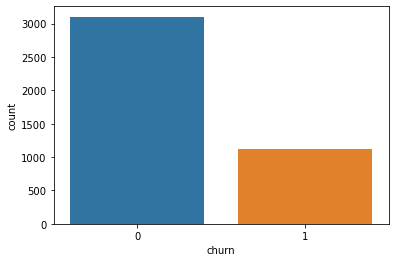

In [39]:
g1 = sns.countplot(x='churn', data=train_telco)
g1

In [10]:
train_telco.churn.describe()

count    4225.000000
mean        0.265325
std         0.441559
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: churn, dtype: float64

<AxesSubplot:xlabel='tenure', ylabel='Count'>

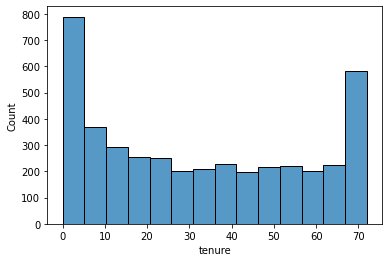

In [40]:
g2 = sns.histplot(x='tenure', data=train_telco)
g2

In [12]:
train_telco.tenure.describe()

count    4225.000000
mean       32.736568
std        24.518294
min         0.000000
25%         9.000000
50%        30.000000
75%        56.000000
max        72.000000
Name: tenure, dtype: float64

<AxesSubplot:xlabel='monthly_charges', ylabel='Count'>

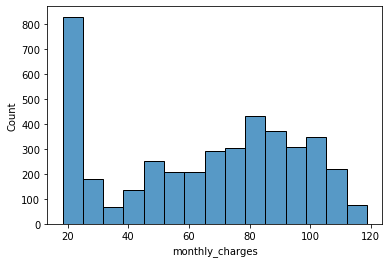

In [13]:
sns.histplot(x=train_telco.monthly_charges)

In [14]:
train_telco.monthly_charges.describe()

count    4225.000000
mean       64.975325
std        30.184347
min        18.250000
25%        35.750000
50%        70.550000
75%        90.050000
max       118.750000
Name: monthly_charges, dtype: float64

<AxesSubplot:xlabel='senior_citizen', ylabel='count'>

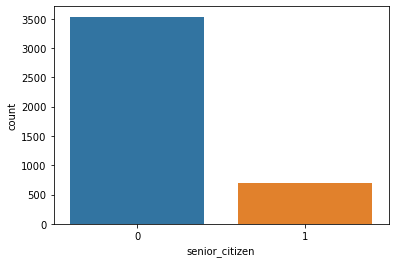

In [15]:
sns.countplot(x=train_telco.senior_citizen)

In [16]:
train_telco.senior_citizen.describe()

count    4225.000000
mean        0.163314
std         0.369695
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: senior_citizen, dtype: float64

<AxesSubplot:xlabel='internet_service_type', ylabel='count'>

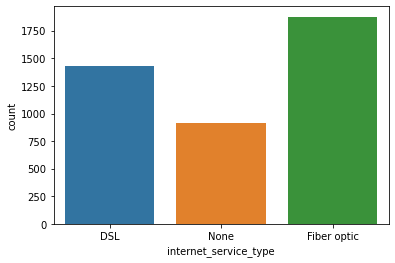

In [17]:
sns.countplot(x='internet_service_type', data=train_telco)

In [18]:
train_telco.internet_service_type.value_counts()

Fiber optic    1876
DSL            1432
None            917
Name: internet_service_type, dtype: int64

<AxesSubplot:xlabel='payment_type', ylabel='count'>

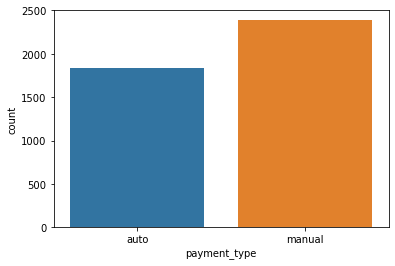

In [19]:
sns.countplot(x='payment_type', data=train_telco)

<AxesSubplot:xlabel='contract_type', ylabel='count'>

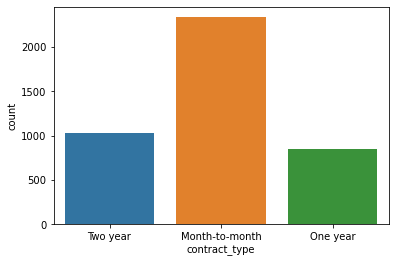

In [20]:
sns.countplot(x='contract_type', data=train_telco)

In [21]:
train_telco.contract_type.value_counts()

Month-to-month    2335
Two year          1036
One year           854
Name: contract_type, dtype: int64

<AxesSubplot:xlabel='phone_service', ylabel='count'>

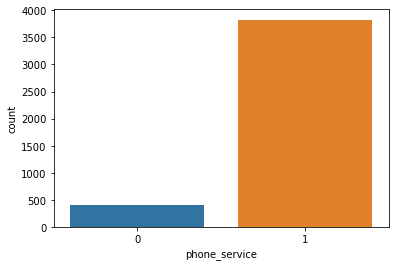

In [22]:
sns.countplot(x='phone_service', data=train_telco)

In [23]:
train_telco.phone_service.value_counts()

1    3825
0     400
Name: phone_service, dtype: int64

<AxesSubplot:xlabel='multiple_lines', ylabel='count'>

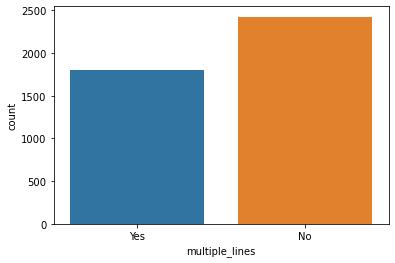

In [24]:
sns.countplot(x='multiple_lines', data=train_telco)

In [25]:
train_telco.multiple_lines.value_counts()

No     2423
Yes    1802
Name: multiple_lines, dtype: int64

<AxesSubplot:xlabel='paperless_billing', ylabel='count'>

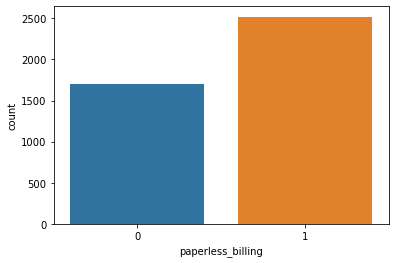

In [26]:
sns.countplot(x='paperless_billing', data=train_telco)

In [27]:
train_telco.paperless_billing.describe()

count    4225.000000
mean        0.595976
std         0.490760
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: paperless_billing, dtype: float64

<AxesSubplot:xlabel='streaming_tv', ylabel='count'>

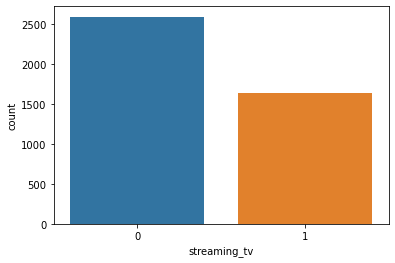

In [33]:
sns.countplot(x=train_telco.streaming_tv)

In [34]:
train_telco.streaming_tv.value_counts()

0    2590
1    1635
Name: streaming_tv, dtype: int64

<AxesSubplot:xlabel='streaming_movies', ylabel='count'>

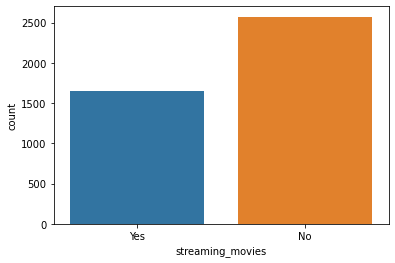

In [49]:
sns.countplot(x=train_telco.streaming_movies)

In [50]:
train_telco.streaming_movies.value_counts()

No     2571
Yes    1654
Name: streaming_movies, dtype: int64

<AxesSubplot:xlabel='streaming', ylabel='count'>

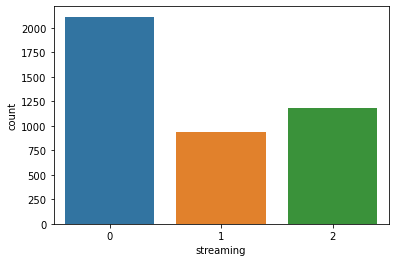

In [36]:
sns.countplot(x=train_telco.streaming)

In [35]:
train_telco.streaming.value_counts()

0    2112
2    1176
1     937
Name: streaming, dtype: int64

<AxesSubplot:xlabel='extras', ylabel='count'>

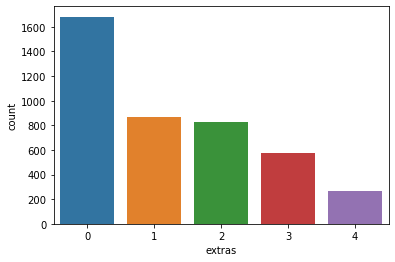

In [31]:
sns.countplot(x=train_telco.extras)

In [32]:
train_telco.extras.value_counts()

0    1682
1     870
2     829
3     576
4     268
Name: extras, dtype: int64

<AxesSubplot:xlabel='online_security', ylabel='count'>

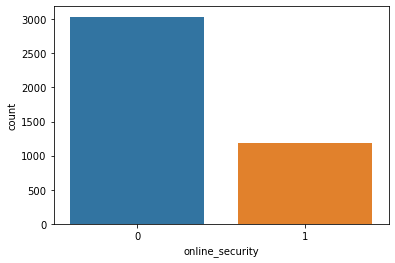

In [37]:
sns.countplot(x=train_telco.online_security)

In [38]:
train_telco.online_security.value_counts()

0    3034
1    1191
Name: online_security, dtype: int64

<AxesSubplot:xlabel='device_protection', ylabel='count'>

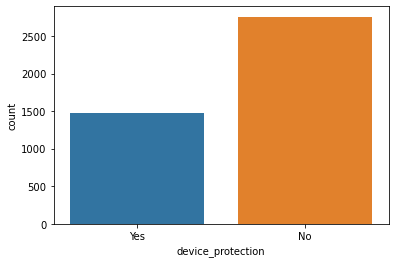

In [53]:
sns.countplot(x=train_telco.device_protection)

In [54]:
train_telco.device_protection.value_counts()

No     2755
Yes    1470
Name: device_protection, dtype: int64

<AxesSubplot:xlabel='tech_support', ylabel='count'>

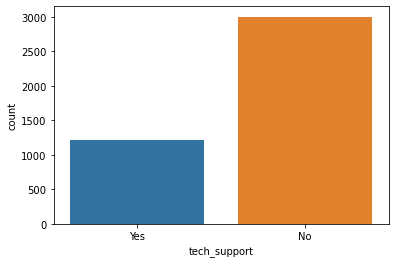

In [55]:
sns.countplot(x=train_telco.tech_support)

In [56]:
train_telco.tech_support.value_counts()

No     3003
Yes    1222
Name: tech_support, dtype: int64

<AxesSubplot:xlabel='online_backup', ylabel='count'>

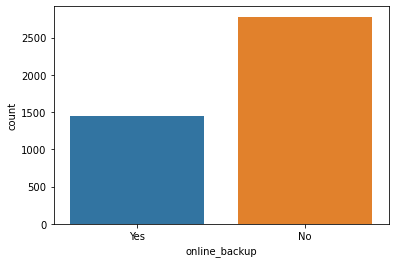

In [57]:
sns.countplot(x=train_telco.online_backup)

In [58]:
train_telco.online_backup.value_counts()

No     2780
Yes    1445
Name: online_backup, dtype: int64

<AxesSubplot:xlabel='partner', ylabel='count'>

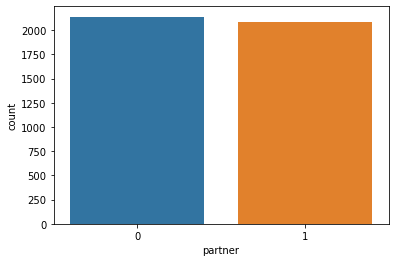

In [59]:
sns.countplot(x=train_telco.partner)

<AxesSubplot:xlabel='dependents', ylabel='count'>

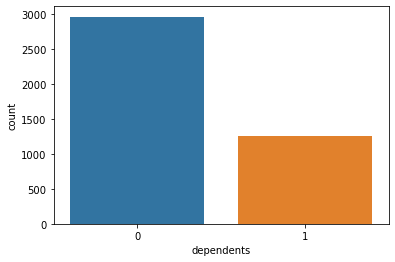

In [60]:
sns.countplot(x=train_telco.dependents)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt

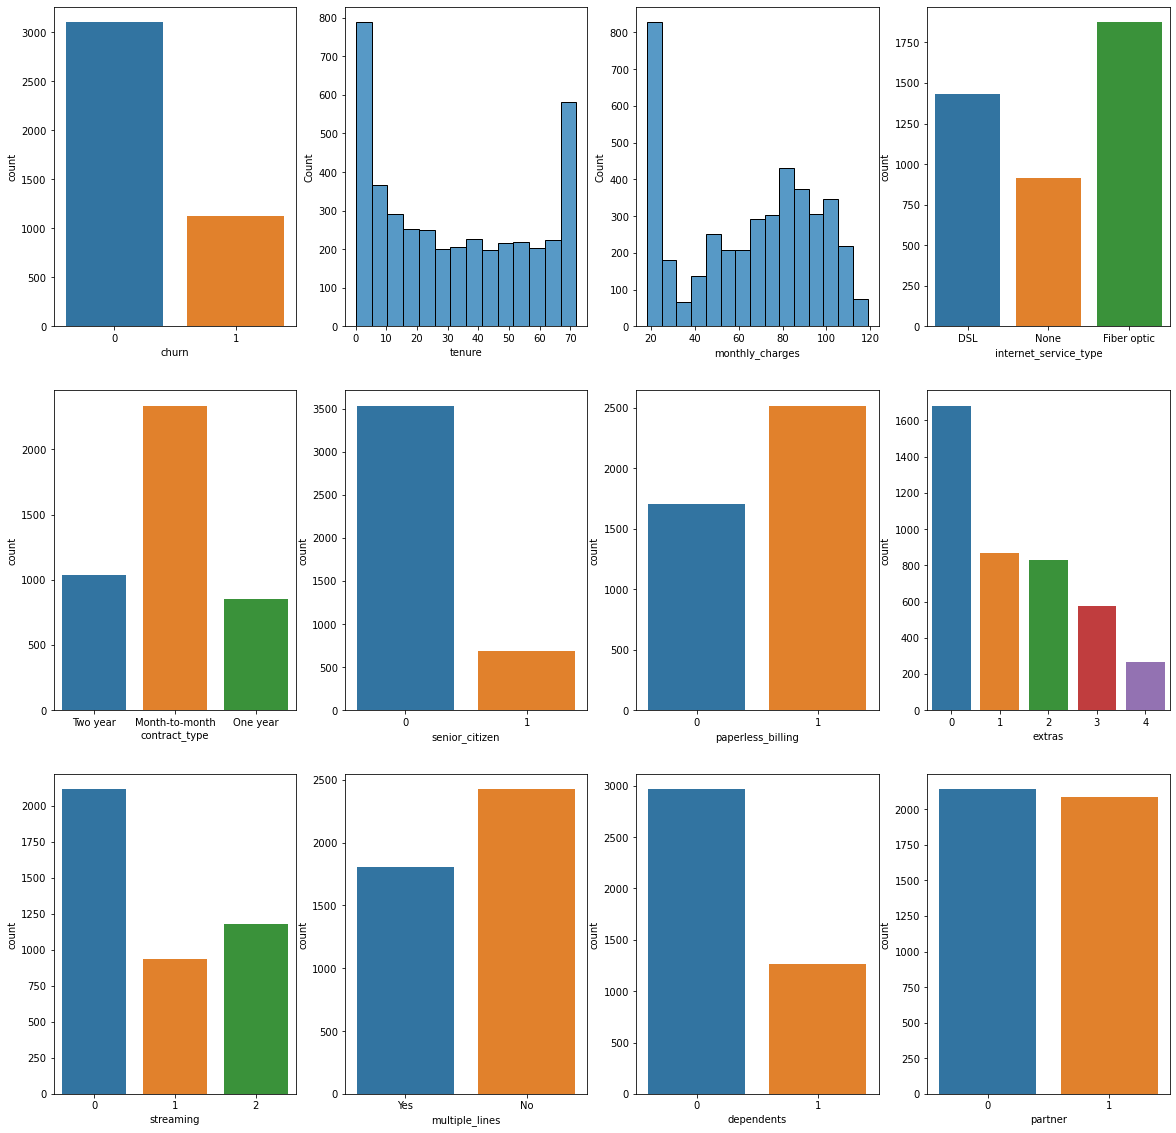

In [77]:
plt.figure(figsize=[20,20])

plt.subplot(341)
sns.countplot(train_telco.churn)

plt.subplot(342)
sns.histplot(train_telco.tenure)

plt.subplot(343)
sns.histplot(train_telco.monthly_charges)

plt.subplot(344)
sns.countplot(train_telco.internet_service_type)

plt.subplot(345)
sns.countplot(train_telco.contract_type)

plt.subplot(346)
sns.countplot(train_telco.senior_citizen)

plt.subplot(347)
sns.countplot(train_telco.paperless_billing)

plt.subplot(348)
sns.countplot(train_telco.extras)

plt.subplot(349)
sns.countplot(train_telco.streaming)

plt.subplot(3,4,10)
sns.countplot(train_telco.multiple_lines)

plt.subplot(3,4,11)
sns.countplot(train_telco.dependents)

plt.subplot(3,4,12)
sns.countplot(train_telco.partner)

plt.show()

#### Findings:

- 26.5 percent of customers churned

- Average tenure is 32.7 months, but most customers are between 0-5 and 65-70 months.

- Average monthly charge is 65, but most customers pay between 18-25

- 16 percent of customers are senior citizens

- Fiber optic is the most popular internet service type

- more customers make manual payments than automatic payments

- More customers have a month-to-month contract type than two-year and one-year contracts combined

- Most customers have phone service, and more customers have only one line rather than multiple lines

- 59.6 percent of customers use paperless billing

- There are more customers who do not have additional features than do (streaming, protection, support, etc.)

- Customers are almost evenly split between having a partner and not, but more customers do not have dependents.



### Bivariate analysis

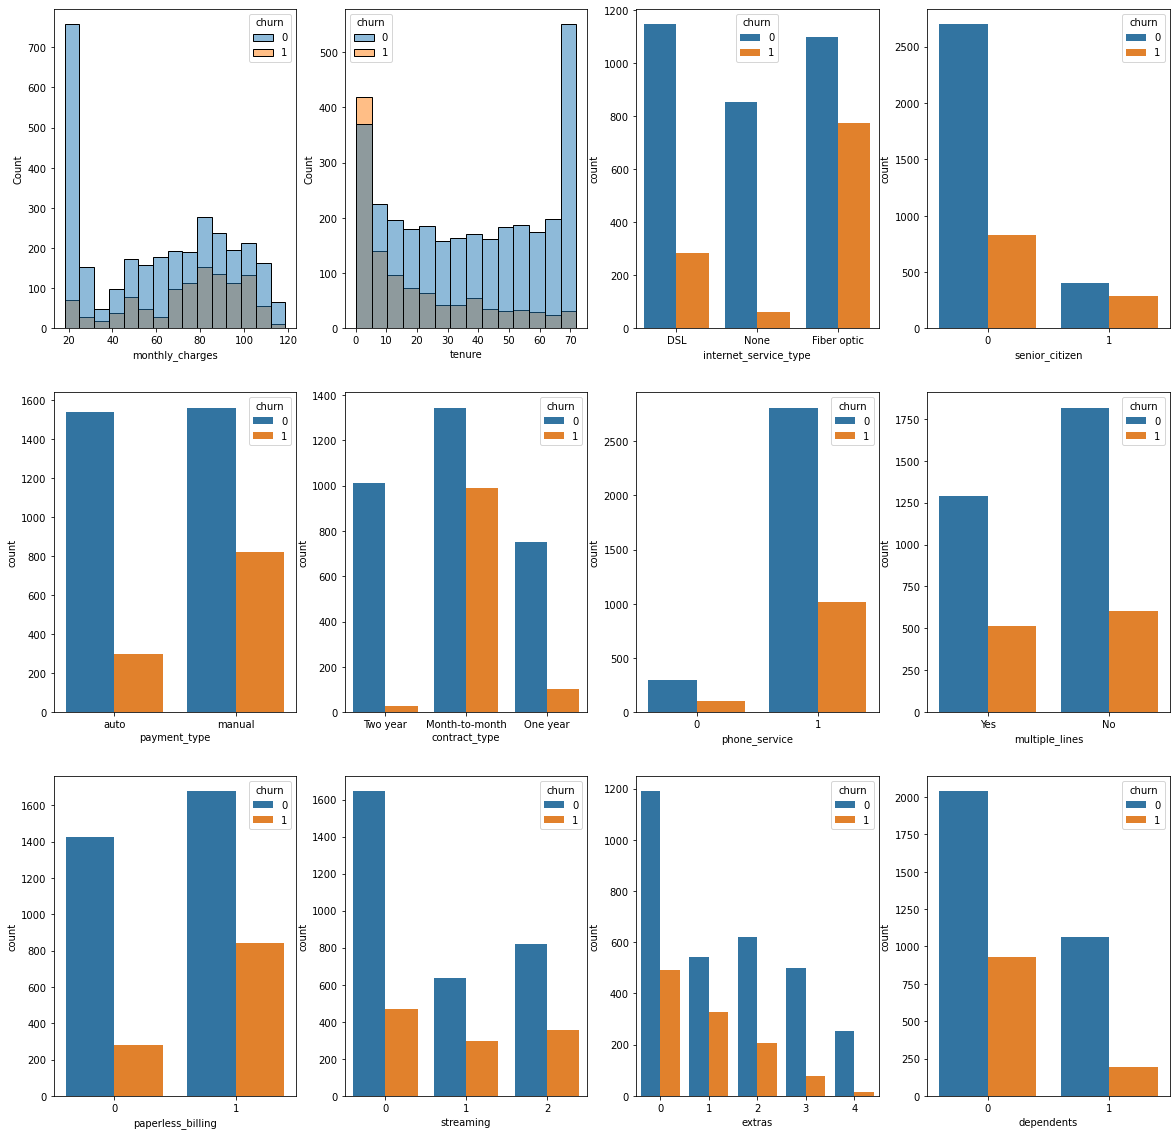

In [88]:
plt.figure(figsize=[20,20])
plt.subplot(341)
sns.histplot(x=train_telco.monthly_charges, hue=train_telco.churn)

plt.subplot(342)
sns.histplot(x=train_telco.tenure, hue=train_telco.churn)

plt.subplot(343)
sns.countplot(x='internet_service_type', hue='churn', data=train_telco)

plt.subplot(344)
sns.countplot(x=train_telco.senior_citizen, hue=train_telco.churn)

plt.subplot(345)
sns.countplot(x='payment_type', hue='churn', data=train_telco)

plt.subplot(346)
sns.countplot(x='contract_type', hue='churn', data=train_telco)

plt.subplot(347)
sns.countplot(x='phone_service', hue='churn', data=train_telco)

plt.subplot(348)
sns.countplot(x='multiple_lines', hue='churn', data=train_telco)

plt.subplot(349)
sns.countplot(x='paperless_billing', hue='churn', data=train_telco)

plt.subplot(3,4,10)
sns.countplot(x='streaming', hue='churn', data=train_telco)

plt.subplot(3,4,11)
sns.countplot(x='extras', hue='churn', data=train_telco)

plt.subplot(3,4,12)
sns.countplot(x='dependents', hue='churn', data=train_telco)

plt.show()

In [249]:
plot_telco = train_telco.drop(columns=['customer_id', 'gender', 'contract_type', 'payment_type', 'multiple_lines', 'streaming_tv', 'streaming_movies', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'total_charges'])

<AxesSubplot:>

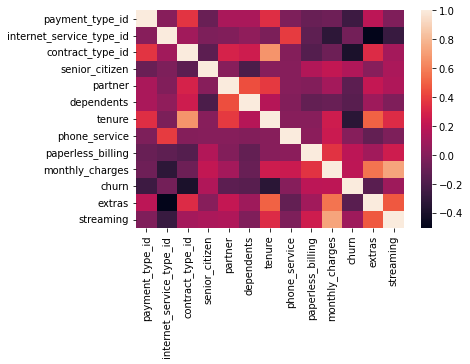

In [250]:
sns.heatmap(plot_telco.corr())

In [63]:
corr, p = stats.pearsonr(train_telco.monthly_charges, train_telco.churn)
corr, p

(0.19733529945537656, 2.3330208636155277e-38)

In [66]:
corr, p = stats.pearsonr(train_telco.tenure, train_telco.churn)
corr, p

(-0.3398785497306553, 9.804162371170059e-115)

In [69]:
observed = pd.crosstab(train_telco.senior_citizen, train_telco.churn)
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [70]:
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[2702  833]
 [ 402  288]]

Expected
[[2597  937]
 [ 506  183]]

----
chi^2 = 96.9007
p     = 0.0000


In [73]:
observed = pd.crosstab(train_telco.internet_service_type, train_telco.churn)
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [74]:
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[1149  283]
 [1100  776]
 [ 855   62]]

Expected
[[1052  379]
 [1378  497]
 [ 673  243]]

----
chi^2 = 429.2846
p     = 0.0000


In [77]:
observed = pd.crosstab(train_telco.payment_type, train_telco.churn)
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [78]:
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[1542  298]
 [1562  823]]

Expected
[[1351  488]
 [1752  632]]

----
chi^2 = 177.7362
p     = 0.0000


In [81]:
observed = pd.crosstab(train_telco.contract_type, train_telco.churn)
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [82]:
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[1344  991]
 [ 750  104]
 [1010   26]]

Expected
[[1715  619]
 [ 627  226]
 [ 761  274]]

----
chi^2 = 700.1525
p     = 0.0000


In [85]:
observed = pd.crosstab(train_telco.phone_service, train_telco.churn)
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [86]:
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[ 294  106]
 [2810 1015]]

Expected
[[ 293  106]
 [2810 1014]]

----
chi^2 = 0.0000
p     = 1.0000


In [89]:
observed = pd.crosstab(train_telco.multiple_lines, train_telco.churn)
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [90]:
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[1817  606]
 [1287  515]]

Expected
[[1780  642]
 [1323  478]]

----
chi^2 = 6.5714
p     = 0.0104


In [93]:
observed = pd.crosstab(train_telco.paperless_billing, train_telco.churn)
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [94]:
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[1427  280]
 [1677  841]]

Expected
[[1254  452]
 [1849  668]]

----
chi^2 = 149.8964
p     = 0.0000


In [97]:
observed = pd.crosstab(train_telco.streaming_tv, train_telco.churn)
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [98]:
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[1973  617]
 [1131  504]]

Expected
[[1902  687]
 [1201  433]]

----
chi^2 = 24.8606
p     = 0.0000


In [101]:
observed = pd.crosstab(train_telco.streaming_movies, train_telco.churn)
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [102]:
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[1953  618]
 [1151  503]]

Expected
[[1888  682]
 [1215  438]]

----
chi^2 = 20.6507
p     = 0.0000


In [139]:
observed = pd.crosstab(train_telco.streaming, train_telco.churn)
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [140]:
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[1644  468]
 [ 638  299]
 [ 822  354]]

Expected
[[1551  560]
 [ 688  248]
 [ 863  312]]

----
chi^2 = 42.3126
p     = 0.0000


In [105]:
observed = pd.crosstab(train_telco.online_security, train_telco.churn)
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [106]:
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[2103  931]
 [1001  190]]

Expected
[[2229  804]
 [ 874  316]]

----
chi^2 = 94.4781
p     = 0.0000


In [109]:
observed = pd.crosstab(train_telco.device_protection, train_telco.churn)
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [110]:
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[1972  783]
 [1132  338]]

Expected
[[2024  730]
 [1079  390]]

----
chi^2 = 14.2104
p     = 0.0002


In [113]:
observed = pd.crosstab(train_telco.tech_support, train_telco.churn)
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [114]:
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[2076  927]
 [1028  194]]

Expected
[[2206  796]
 [ 897  324]]

----
chi^2 = 99.4012
p     = 0.0000


In [117]:
observed = pd.crosstab(train_telco.online_backup, train_telco.churn)
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [118]:
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[1973  807]
 [1131  314]]

Expected
[[2042  737]
 [1061  383]]

----
chi^2 = 25.6106
p     = 0.0000


In [137]:
observed = pd.crosstab(train_telco.extras, train_telco.churn)
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [138]:
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[1189  493]
 [ 542  328]
 [ 622  207]
 [ 498   78]
 [ 253   15]]

Expected
[[1235  446]
 [ 639  230]
 [ 609  219]
 [ 423  152]
 [ 196   71]]

----
chi^2 = 173.4979
p     = 0.0000


In [121]:
observed = pd.crosstab(train_telco.partner, train_telco.churn)
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [122]:
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[1437  702]
 [1667  419]]

Expected
[[1571  567]
 [1532  553]]

----
chi^2 = 87.1838
p     = 0.0000


In [125]:
observed = pd.crosstab(train_telco.dependents, train_telco.churn)
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [126]:
print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
[[2038  927]
 [1066  194]]

Expected
[[2178  786]
 [ 925  334]]

----
chi^2 = 113.4056
p     = 0.0000


#### Findings:

- The average monthly charge for customers who churned was 74.9 percent.

- Churn decreases as tenure increases.

- Senior citizens are more likely to churn than non-senior citizens.

- Customers with fiber optic internet service type are more likely to churn than no internet service and DSL.

- Customers with automatic payment are less likely to churn.

- Customers with contracts are less likely to churn than month-to-month customers.

- Customers without paperless billing appear less likely to churn.

- Customers with dependents are less likely to churn.



### Multivariate analysis

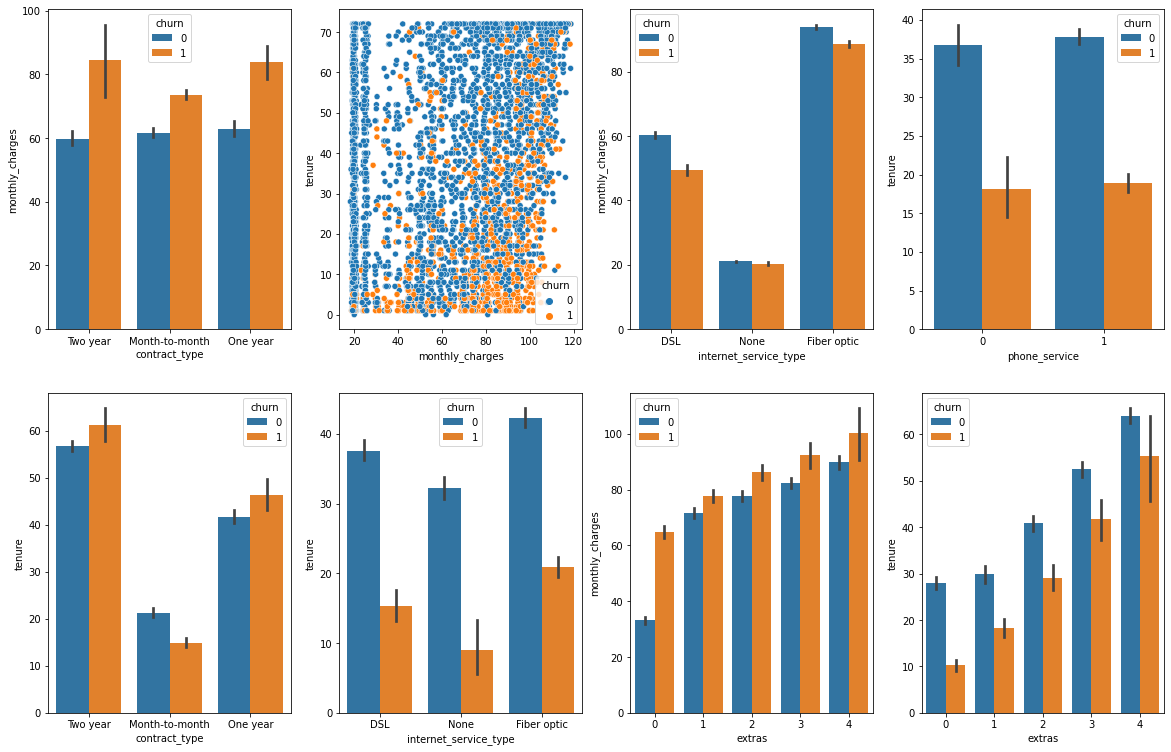

In [97]:
plt.figure(figsize=[20,20])

plt.subplot(341)
sns.barplot(x=train_telco.contract_type, y=train_telco.monthly_charges, hue=train_telco.churn)

plt.subplot(342)
sns.scatterplot(x=train_telco.monthly_charges, y=train_telco.tenure, hue=train_telco.churn)

plt.subplot(343)
sns.barplot(x=train_telco.internet_service_type, y=train_telco.monthly_charges, hue=train_telco.churn)

plt.subplot(344)
sns.barplot(x=train_telco.phone_service, y=train_telco.tenure, hue=train_telco.churn)

plt.subplot(345)
sns.barplot(x=train_telco.contract_type, y=train_telco.tenure, hue=train_telco.churn)

plt.subplot(346)
sns.barplot(x=train_telco.internet_service_type, y=train_telco.tenure, hue=train_telco.churn)

plt.subplot(347)
sns.barplot(x=train_telco.extras, y=train_telco.monthly_charges, hue=train_telco.churn)

plt.subplot(348)
sns.barplot(x=train_telco.extras, y=train_telco.tenure, hue=train_telco.churn)

plt.show()

#### Findings:

- higher monthly charges appears to increase the likelihood of churn across all contract types.

- higher monthly charges and lower tenure appears to have a greater likelihood of churn.

- 



### Modeling

In [254]:
# Baseline prediction is customers do not churn

baseline = len(train_telco[train_telco.churn == 0]) / len(train_telco)
baseline

0.7346745562130178

In [255]:
model1 = DecisionTreeClassifier(max_depth=4)

In [259]:
X_col1 = ['tenure', 'monthly_charges', 'contract_type_id', 'internet_service_type_id', 'senior_citizen', 'partner', 'dependents', 'extras', 'streaming']
y_col1 = 'churn'

X_train1, y_train1 = train_telco[X_col1], train_telco[y_col1]
X_validate1, y_validate1 = validate_telco[X_col1], validate_telco[y_col1]

In [260]:
model1.fit(X_train1, y_train1)
print(f'training score: {model1.score(X_train1, y_train1):.2%}')
print(f'validate score: {model1.score(X_validate1, y_validate1):.2%}')

training score: 79.05%
validate score: 79.84%


IndexError: list index out of range

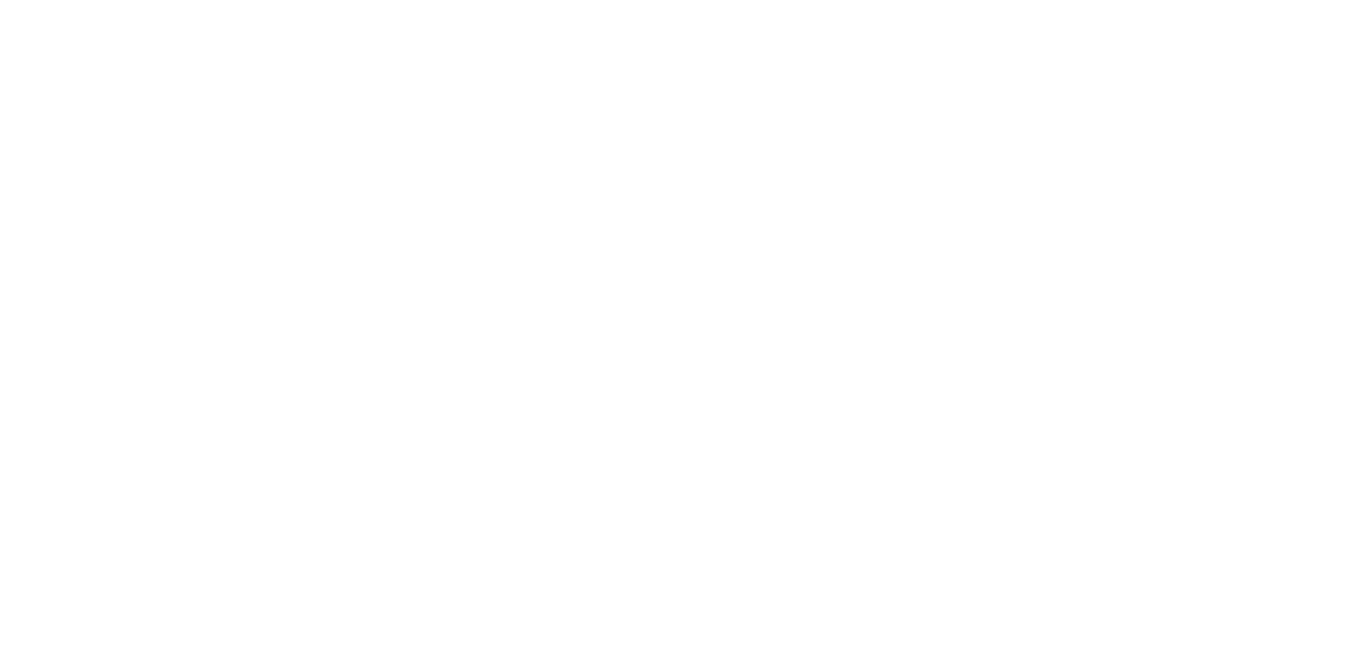

In [261]:
plt.figure(figsize=(24,12))
plot_tree(model1, feature_names=X_train.columns.to_list(), class_names=['no churn', 'churn']);

In [262]:
model2 = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini', min_samples_leaf=3, 
                                 n_estimators=100, max_depth=6, random_state=217)

In [263]:
model2.fit(X_train1, y_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=3, random_state=217)

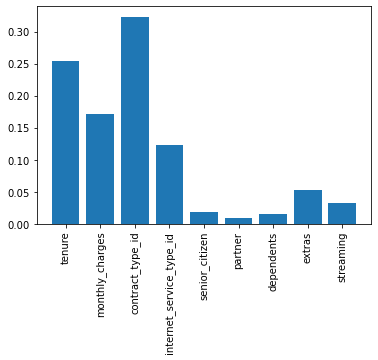

In [264]:
plt.bar(X_train1.columns, model2.feature_importances_)
plt.xticks(rotation=90)
plt.show()

In [265]:
y_pred2 = model2.predict(X_train1)
y_pred_proba2 = model2.predict_proba(X_train1)
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(model2.score(X_train1, y_train1)))
print(classification_report(y_train1, y_pred2))

Accuracy of random forest classifier on training set: 0.80
              precision    recall  f1-score   support

           0       0.83      0.93      0.87      3104
           1       0.70      0.46      0.56      1121

    accuracy                           0.80      4225
   macro avg       0.76      0.70      0.72      4225
weighted avg       0.79      0.80      0.79      4225



In [266]:
y_pred2 = model2.predict(X_validate1)
y_pred_proba2 = model2.predict_proba(X_validate1)
print('Accuracy of random forest classifier on test set: {:.2f}'
     .format(model2.score(X_validate1, y_validate1)))
print(classification_report(y_validate1, y_pred2))

Accuracy of random forest classifier on test set: 0.81
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1035
           1       0.69      0.49      0.57       374

    accuracy                           0.81      1409
   macro avg       0.76      0.70      0.72      1409
weighted avg       0.80      0.81      0.79      1409



In [267]:
metrics = []

for i in range(2, 25):
    # Make the model
    forest = RandomForestClassifier(max_depth=i, random_state=217)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train1, y_train1)

    # Use the model
    # We'll evaluate the model's performance on train, first then check validate
    in_sample_accuracy = forest.score(X_train1, y_train1)
    
    out_of_sample_accuracy = forest.score(X_validate1, y_validate1)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,max_depth,train_accuracy,validate_accuracy,difference
0,2,0.745799,0.741661,0.004138
1,3,0.789586,0.796309,-0.006724
2,4,0.794083,0.801987,-0.007904
3,5,0.799763,0.806246,-0.006482
4,6,0.805444,0.808375,-0.002931
5,7,0.817515,0.805536,0.011979
6,8,0.836213,0.808375,0.027838
7,9,0.861065,0.806955,0.054110
8,10,0.881893,0.809084,0.072809
9,11,0.911479,0.809084,0.102395


In [269]:
metrics = []


for i in range(2, 50):
    # Make the model
    depth = 8
    n_samples = i
    forest = RandomForestClassifier(max_depth=depth, min_samples_leaf=n_samples, random_state=217)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train1, y_train1)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train1, y_train1)
    
    out_of_sample_accuracy = forest.score(X_validate1, y_validate1)

    output = {
        "min_samples_per_leaf": n_samples,
        "max_depth": depth,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,min_samples_per_leaf,max_depth,train_accuracy,validate_accuracy,difference
0,2,8,0.834083,0.805536,0.028547
1,3,8,0.834556,0.800568,0.033988
2,4,8,0.829822,0.803407,0.026416
3,5,8,0.828402,0.802697,0.025705
4,6,8,0.824852,0.809794,0.015058
5,7,8,0.821775,0.804826,0.016949
6,8,8,0.820828,0.804826,0.016002
7,9,8,0.822722,0.802697,0.020025
8,10,8,0.821065,0.801987,0.019078
9,11,8,0.820828,0.804826,0.016002


In [195]:
metrics = []
max_depth = 20

for i in range(2, max_depth):
    # Make the model
    depth = i
    n_samples = i
    forest = RandomForestClassifier(max_depth=depth, min_samples_leaf=n_samples, random_state=217)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train1, y_train1)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train1, y_train1)
    
    out_of_sample_accuracy = forest.score(X_validate1, y_validate1)

    output = {
        "min_samples_per_leaf": n_samples,
        "max_depth": depth,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,min_samples_per_leaf,max_depth,train_accuracy,validate_accuracy,difference
0,2,2,0.734675,0.734564,0.000111
1,3,3,0.781302,0.789212,-0.007910
2,4,4,0.791243,0.801278,-0.010035
3,5,5,0.794793,0.802697,-0.007904
4,6,6,0.798580,0.809084,-0.010505
5,7,7,0.809467,0.812633,-0.003166
6,8,8,0.813254,0.810504,0.002751
7,9,9,0.818698,0.811214,0.007485
8,10,10,0.822249,0.812633,0.009615
9,11,11,0.825325,0.807665,0.017660


In [197]:
model3 = DecisionTreeClassifier(max_depth=4)
X_col3 = ['tenure', 'contract_type_id', 'monthly_charges', 'internet_service_type_id', 'extras']
y_col3 = 'churn'

In [198]:
X_train3, y_train3 = train_telco[X_col3], train_telco[y_col3]
X_validate3, y_validate3 = validate_telco[X_col3], validate_telco[y_col3]

In [199]:
model3.fit(X_train3, y_train3)
print(f'training score: {model3.score(X_train3, y_train3):.2%}')
print(f'validate score: {model3.score(X_validate3, y_validate3):.2%}')

training score: 79.05%
validate score: 79.84%


In [200]:
model4 = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini', min_samples_leaf=3, 
                                 n_estimators=100, max_depth=6, random_state=217)

In [201]:
model4.fit(X_train3, y_train3)

RandomForestClassifier(max_depth=6, min_samples_leaf=3, random_state=217)

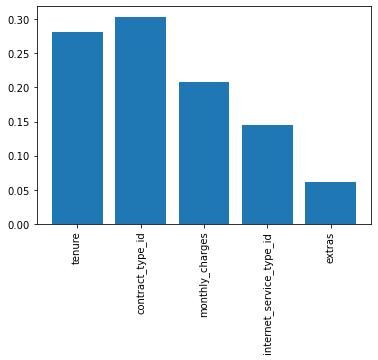

In [202]:
plt.bar(X_train3.columns, model4.feature_importances_)
plt.xticks(rotation=90)
plt.show()

In [205]:
y_pred3 = model4.predict(X_train3)
y_pred_proba3 = model4.predict_proba(X_train3)
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(model4.score(X_train3, y_train3)))
print(classification_report(y_train3, y_pred3))

Accuracy of random forest classifier on training set: 0.81
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      3104
           1       0.69      0.48      0.57      1121

    accuracy                           0.81      4225
   macro avg       0.76      0.70      0.72      4225
weighted avg       0.79      0.81      0.79      4225



In [206]:
y_pred3 = model4.predict(X_validate3)
y_pred_proba3 = model4.predict_proba(X_validate3)
print('Accuracy of random forest classifier on test set: {:.2f}'
     .format(model4.score(X_validate3, y_validate3)))
print(classification_report(y_validate3, y_pred3))

Accuracy of random forest classifier on test set: 0.81
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1035
           1       0.69      0.49      0.57       374

    accuracy                           0.81      1409
   macro avg       0.76      0.71      0.72      1409
weighted avg       0.79      0.81      0.79      1409



In [207]:
model5 = DecisionTreeClassifier(max_depth=6)

In [208]:
X_col5 = ['tenure', 'monthly_charges', 'payment_type_id', 'contract_type_id', 'internet_service_type_id', 'extras', 'streaming']
y_col5 = 'churn'

In [209]:
X_train5, y_train5 = train_telco[X_col5], train_telco[y_col5]
X_validate5, y_validate5 = validate_telco[X_col5], validate_telco[y_col5]

In [210]:
model5.fit(X_train5, y_train5)
print(f'training score: {model5.score(X_train5, y_train5):.2%}')
print(f'validate score: {model5.score(X_validate5, y_validate5):.2%}')

training score: 80.57%
validate score: 78.85%


In [211]:
model6 = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini', min_samples_leaf=5, 
                                 n_estimators=100, max_depth=8, random_state=217)

In [212]:
model6.fit(X_train5, y_train5)

RandomForestClassifier(max_depth=8, min_samples_leaf=5, random_state=217)

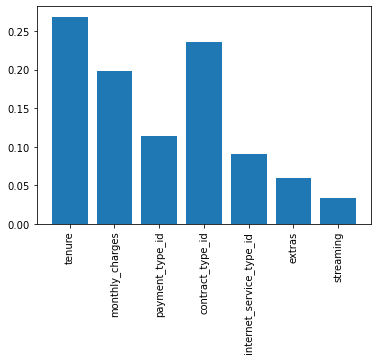

In [213]:
plt.bar(X_train5.columns, model6.feature_importances_)
plt.xticks(rotation=90)
plt.show()

In [214]:
y_pred4 = model6.predict(X_train5)
y_pred_proba4 = model5.predict_proba(X_train5)
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(model6.score(X_train5, y_train5)))
print(classification_report(y_train5, y_pred4))

Accuracy of random forest classifier on training set: 0.82
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      3104
           1       0.71      0.56      0.62      1121

    accuracy                           0.82      4225
   macro avg       0.78      0.74      0.75      4225
weighted avg       0.81      0.82      0.81      4225



In [215]:
y_pred4 = model6.predict(X_validate5)
y_pred_proba4 = model6.predict_proba(X_validate5)
print('Accuracy of random forest classifier on test set: {:.2f}'
     .format(model6.score(X_validate5, y_validate5)))
print(classification_report(y_validate5, y_pred4))

Accuracy of random forest classifier on test set: 0.80
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.66      0.53      0.59       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.80      1409



In [216]:
model7 = DecisionTreeClassifier(max_depth=6)

In [217]:
X_col7 = ['tenure', 'monthly_charges', 'contract_type_id', 'internet_service_type_id', 'senior_citizen', 'partner', 'dependents']
y_col7 = 'churn'

In [218]:
X_train7, y_train7 = train_telco[X_col7], train_telco[y_col7]
X_validate7, y_validate7 = validate_telco[X_col7], validate_telco[y_col7]

In [219]:
model7.fit(X_train7, y_train7)
print(f'training score: {model7.score(X_train7, y_train7):.2%}')
print(f'validate score: {model7.score(X_validate7, y_validate7):.2%}')

training score: 80.31%
validate score: 78.64%


In [220]:
model8 = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini', min_samples_leaf=3, 
                                 n_estimators=100, max_depth=8, random_state=217)

In [221]:
model8.fit(X_train7, y_train7)

RandomForestClassifier(max_depth=8, min_samples_leaf=3, random_state=217)

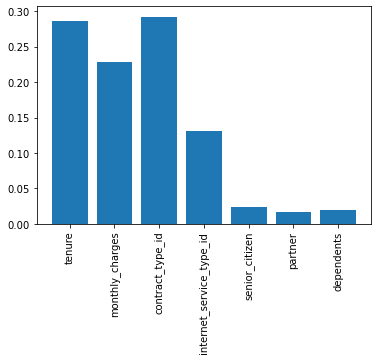

In [223]:
plt.bar(X_train7.columns, model8.feature_importances_)
plt.xticks(rotation=90)
plt.show()

In [224]:
y_pred5 = model8.predict(X_train7)
y_pred_proba5 = model8.predict_proba(X_train7)
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(model8.score(X_train7, y_train7)))
print(classification_report(y_train7, y_pred5))

Accuracy of random forest classifier on training set: 0.82
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      3104
           1       0.72      0.54      0.61      1121

    accuracy                           0.82      4225
   macro avg       0.78      0.73      0.75      4225
weighted avg       0.81      0.82      0.81      4225



In [225]:
y_pred5 = model8.predict(X_validate7)
y_pred_proba5 = model8.predict_proba(X_validate7)
print('Accuracy of random forest classifier on test set: {:.2f}'
     .format(model8.score(X_validate7, y_validate7)))
print(classification_report(y_validate7, y_pred5))

Accuracy of random forest classifier on test set: 0.81
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1035
           1       0.68      0.55      0.61       374

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



In [226]:
X_col9 = ['tenure', 'monthly_charges', 'dependents', 'contract_type_id', 'extras', 'internet_service_type_id', 'payment_type_id', 'partner', 'senior_citizen']
y_col9 = 'churn'
X_train9, y_train9 = train_telco[X_col9], train_telco[y_col9]
X_validate9, y_validate9 = validate_telco[X_col9], validate_telco[y_col9]

In [227]:
# Let's continue getting loopy, so we can compare in-sample to out-of-sample
metrics = []

for i in range(2, 25):
    # Make the model
    forest = RandomForestClassifier(max_depth=i, random_state=217)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train9, y_train9)

    # Use the model
    # We'll evaluate the model's performance on train, first then check validate
    in_sample_accuracy = forest.score(X_train9, y_train9)
    
    out_of_sample_accuracy = forest.score(X_validate9, y_validate9)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,max_depth,train_accuracy,validate_accuracy,difference
0,2,0.768757,0.777857,-0.009099
1,3,0.780592,0.785664,-0.005072
2,4,0.793136,0.804826,-0.011690
3,5,0.801420,0.810504,-0.009084
4,6,0.807574,0.815472,-0.007898
5,7,0.820355,0.818311,0.002044
6,8,0.837160,0.815472,0.021688
7,9,0.861065,0.811214,0.049851
8,10,0.888047,0.809084,0.078963
9,11,0.918817,0.811923,0.106893


In [228]:
for i in range(2, 25):
    # Make the model
    forest = RandomForestClassifier(max_depth=i, random_state=217)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train9, y_train9)

    # Use the model
    # We'll evaluate the model's performance on train, first
    y_predictions = forest.predict(X_train9)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train9, y_predictions, output_dict=True)
    print(f"Tree with max depth of {i}")
    print(pd.DataFrame(report))
    print()

Tree with max depth of 2
                     0            1  accuracy    macro avg  weighted avg
precision     0.772343     0.725000  0.768757     0.748672      0.759782
recall        0.971649     0.206958  0.768757     0.589304      0.768757
f1-score      0.860608     0.321999  0.768757     0.591303      0.717701
support    3104.000000  1121.000000  0.768757  4225.000000   4225.000000

Tree with max depth of 3
                     0            1  accuracy    macro avg  weighted avg
precision     0.790499     0.702929  0.780592     0.746714      0.767264
recall        0.954253     0.299732  0.780592     0.626992      0.780592
f1-score      0.864691     0.420263  0.780592     0.642477      0.746773
support    3104.000000  1121.000000  0.780592  4225.000000   4225.000000

Tree with max depth of 4
                     0            1  accuracy    macro avg  weighted avg
precision     0.812500     0.687976  0.793136     0.750238      0.779461
recall        0.933956     0.403211  0.793136  

Tree with max depth of 23
                     0            1  accuracy    macro avg  weighted avg
precision     0.995186     0.997295   0.99574     0.996240      0.995746
recall        0.999034     0.986619   0.99574     0.992826      0.995740
f1-score      0.997106     0.991928   0.99574     0.994517      0.995732
support    3104.000000  1121.000000   0.99574  4225.000000   4225.000000

Tree with max depth of 24
                     0            1  accuracy    macro avg  weighted avg
precision     0.995186     0.997295   0.99574     0.996240      0.995746
recall        0.999034     0.986619   0.99574     0.992826      0.995740
f1-score      0.997106     0.991928   0.99574     0.994517      0.995732
support    3104.000000  1121.000000   0.99574  4225.000000   4225.000000



In [229]:
metrics = []


for i in range(2, 50):
    # Make the model
    depth = 4
    n_samples = i
    forest = RandomForestClassifier(max_depth=depth, min_samples_leaf=n_samples, random_state=217)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train9, y_train9)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train9, y_train9)
    
    out_of_sample_accuracy = forest.score(X_validate9, y_validate9)

    output = {
        "min_samples_per_leaf": n_samples,
        "max_depth": depth,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,min_samples_per_leaf,max_depth,train_accuracy,validate_accuracy,difference
0,2,4,0.793136,0.804826,-0.011690
1,3,4,0.792189,0.804116,-0.011927
2,4,4,0.792899,0.804116,-0.011217
3,5,4,0.792663,0.801987,-0.009325
4,6,4,0.793136,0.802697,-0.009561
5,7,4,0.792899,0.802697,-0.009798
6,8,4,0.792663,0.801987,-0.009325
7,9,4,0.792899,0.801987,-0.009088
8,10,4,0.793136,0.801278,-0.008141
9,11,4,0.793136,0.802697,-0.009561


In [230]:
metrics = []
max_depth = 20

for i in range(2, max_depth):
    # Make the model
    depth = i
    n_samples = i
    forest = RandomForestClassifier(max_depth=depth, min_samples_leaf=n_samples, random_state=217)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train9, y_train9)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train9, y_train9)
    
    out_of_sample_accuracy = forest.score(X_validate9, y_validate9)

    output = {
        "min_samples_per_leaf": n_samples,
        "max_depth": depth,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,min_samples_per_leaf,max_depth,train_accuracy,validate_accuracy,difference
0,2,2,0.768757,0.777857,-0.009099
1,3,3,0.780592,0.785664,-0.005072
2,4,4,0.792899,0.804116,-0.011217
3,5,5,0.802367,0.812633,-0.010266
4,6,6,0.807101,0.814762,-0.007662
5,7,7,0.815858,0.814053,0.001805
6,8,8,0.819645,0.812633,0.007012
7,9,9,0.826036,0.816182,0.009854
8,10,10,0.826746,0.814762,0.011983
9,11,11,0.829112,0.813343,0.015770


In [231]:
metrics = []
max_depth = 20

for i in range(2, max_depth):
    # Make the model
    depth = i
    n_samples = max_depth - i
    forest = RandomForestClassifier(max_depth=depth, min_samples_leaf=n_samples, random_state=217)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train9, y_train9)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train9, y_train9)
    
    out_of_sample_accuracy = forest.score(X_validate9, y_validate9)

    output = {
        "min_samples_per_leaf": n_samples,
        "max_depth": depth,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,min_samples_per_leaf,max_depth,train_accuracy,validate_accuracy,difference
0,18,2,0.768757,0.777857,-0.009099
1,17,3,0.778225,0.784244,-0.006019
2,16,4,0.791953,0.802697,-0.010744
3,15,5,0.799290,0.812633,-0.013343
4,14,6,0.805917,0.811923,-0.006006
5,13,7,0.811598,0.814053,-0.002455
6,12,8,0.816095,0.815472,0.000623
7,11,9,0.822249,0.816182,0.006067
8,10,10,0.826746,0.814762,0.011983
9,9,11,0.834556,0.810504,0.024052


In [232]:
model10 = KNeighborsClassifier(n_neighbors=5, weights='uniform')

In [233]:
model10.fit(X_train9, y_train9)

KNeighborsClassifier()

In [235]:
y_pred6 = model10.predict(X_train9)

In [236]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(model10.score(X_train9, y_train9)))

Accuracy of KNN classifier on training set: 0.83


In [237]:
print(classification_report(y_train9, y_pred6))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      3104
           1       0.72      0.59      0.65      1121

    accuracy                           0.83      4225
   macro avg       0.79      0.75      0.77      4225
weighted avg       0.82      0.83      0.82      4225



In [238]:
y_pred6 = model10.predict(X_validate9)
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(model10.score(X_validate9, y_validate9)))

Accuracy of KNN classifier on test set: 0.78


In [239]:
metrics = []

for i in range(4, 101, 2):
    # Make the model
    k_telco = KNeighborsClassifier(n_neighbors=i)

    # Fit the model (on train and only train)
    k_telco = k_telco.fit(X_train9, y_train9)

    # Use the model
    # We'll evaluate the model's performance on train, first then check validate
    in_sample_accuracy = k_telco.score(X_train9, y_train9)
    
    out_of_sample_accuracy = k_telco.score(X_validate9, y_validate9)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,max_depth,train_accuracy,validate_accuracy,difference
0,4,0.837160,0.776437,0.060723
1,6,0.821302,0.782825,0.038477
2,8,0.815385,0.788502,0.026882
3,10,0.813964,0.792051,0.021913
4,12,0.811124,0.792051,0.019073
5,14,0.804734,0.796309,0.008424
6,16,0.809231,0.797019,0.012212
7,18,0.805680,0.795600,0.010081
8,20,0.804970,0.794180,0.010790
9,22,0.802840,0.792051,0.010789


In [240]:
metrics = []

for i in range(500, 1001, 10):
    # Make the model
    k_telco = KNeighborsClassifier(n_neighbors=i, weights='distance')

    # Fit the model (on train and only train)
    k_telco = k_telco.fit(X_train9, y_train9)

    # Use the model
    # We'll evaluate the model's performance on train, first then check validate
    in_sample_accuracy = k_telco.score(X_train9, y_train9)
    
    out_of_sample_accuracy = k_telco.score(X_validate9, y_validate9)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

,max_depth,train_accuracy,validate_accuracy,difference
0,500,0.99574,0.792761,0.202979
1,510,0.99574,0.792761,0.202979
2,520,0.99574,0.792761,0.202979
3,530,0.99574,0.791341,0.204398
4,540,0.99574,0.791341,0.204398
5,550,0.99574,0.792051,0.203689
6,560,0.99574,0.792051,0.203689
7,570,0.99574,0.792761,0.202979
8,580,0.99574,0.793471,0.202269
9,590,0.99574,0.793471,0.202269


In [241]:
model11 = LogisticRegression(random_state=217, max_iter=500, solver='lbfgs')

In [242]:
X_col11 = ['tenure', 'monthly_charges', 'contract_type_id', 'internet_service_type_id']
y_col11 = 'churn'
X_train11, y_train11 = train_telco[X_col11], train_telco[y_col11]
X_validate11, y_validate11 = validate_telco[X_col11], validate_telco[y_col11]

In [243]:
model11.fit(X_train11, y_train11)

LogisticRegression(max_iter=500, random_state=217)

In [244]:
print('Coefficient: \n', model11.coef_)
print('Intercept: \n', model11.intercept_)

Coefficient: 
 [[-0.03337827  0.02829283 -1.06011475 -0.05711007]]
Intercept: 
 [-0.46039614]


In [245]:
y_pred7 = model11.predict(X_train11)
y_pred_proba7 = model11.predict_proba(X_train11)

In [246]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(model11.score(X_train11, y_train11)))

Accuracy of Logistic Regression classifier on training set: 0.79


In [247]:
print(confusion_matrix(y_train11, y_pred7))

[[2778  326]
 [ 581  540]]


In [248]:
y_pred7 = model11.predict(X_validate11)

print("Model 1: solver = lbfgs, c = 1")

# accuracy of model 1
print('Accuracy: {:.2f}'.format(model11.score(X_validate11, y_validate11)))

# confusion matrix of model 1
print(confusion_matrix(y_validate11, y_pred7))

# classification report of model 1
print(classification_report(y_validate11, y_pred7))

Model 1: solver = lbfgs, c = 1
Accuracy: 0.80
[[927 108]
 [180 194]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.64      0.52      0.57       374

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409

